<a href="https://colab.research.google.com/github/ipulkitg/TerraBlueXT/blob/main/Internship_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fractal Analysis

In [ ]:
!pip install nolds

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
import nolds

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TerraBlue XT/intern_dataset (1).csv')
print(len(df))

912000


In [ ]:
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [ ]:
df.tail()

,Time,Signal1,Signal2,Label
911995,2020-01-04 10:55:49.186,34673.811155,0.151395,C
911996,2020-01-04 10:55:49.196,34672.951723,0.151385,C
911997,2020-01-04 10:55:49.206,34671.967555,0.151373,C
911998,2020-01-04 10:55:49.216,34670.877944,0.151359,C
911999,2020-01-04 10:55:49.226,34669.694865,0.151342,C


In [ ]:
#Checking for null values
df.isnull().sum()

Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64

In [ ]:
df['Label'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
#seperating data based on labels
df_A = df[df['Label'] == 'A']
print(len(df_A))
df_B = df[df['Label'] == 'B']
print(len(df_B))
df_C = df[df['Label'] == 'C']
print(len(df_C))

318000
312000
282000


Found various repositories for hurst exponent, DFA and various packages for analysis of the data. 

However, I also came across a python library known as 'nolds' which can easily help to calculate complex exponents that are used to gain insights related to complexity of given time-series data.

#Calculating Hurst exponent 


##For Label 'A'

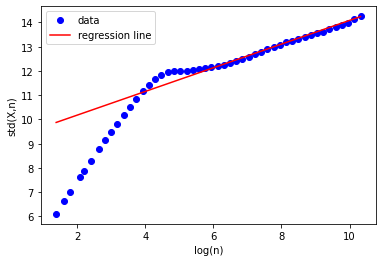

DFA exponent: 0.4887221178411362


In [ ]:
series_A = np.array(df_A['Signal1'])
alpha = nolds.dfa(series_A, overlap=True, debug_plot=True )
print("DFA exponent: {}".format(alpha), )

In [ ]:
series_A = np.array(df_A['Signal2'])
alpha = nolds.dfa(series_A, )
print("DFA exponent: {}".format(alpha))

DFA exponent: 1.8449455786251898


##For Label 'B'

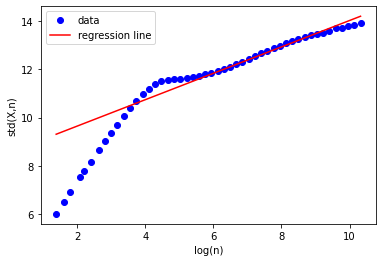

DFA exponent: 0.5472754646426637


In [ ]:
series_B = np.array(df_B['Signal1'])
alpha = nolds.dfa(series_B,overlap = True,debug_plot=True)
print("DFA exponent: {}".format(alpha))

In [ ]:
series_B = np.array(df_B['Signal2'])
alpha = nolds.dfa(series_B)
print("DFA exponent: {}".format(alpha))

DFA exponent: 1.8176714270845755


##For Label 'C'

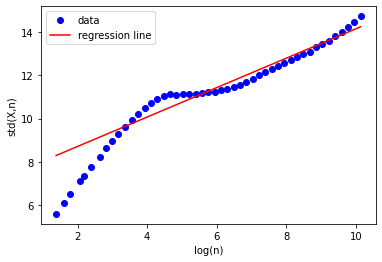

DFA exponent: 0.6795753276194875


In [ ]:
series_C = np.array(df_C['Signal1'])
alpha = nolds.dfa(series_C,overlap = True,debug_plot=True )
print("DFA exponent: {}".format(alpha))

In [ ]:
series_C = np.array(df_C['Signal2'])
alpha = nolds.dfa(series_C, )
print("DFA exponent: {}".format(alpha))

DFA exponent: 1.7160380861830327


The data is large and it takes sometime to run the problem, but as we can see,DFA Exponent value for Signal1 is conclusive because the optimum value of the exponent lies in the range [0,1] and the values of their corresponding exponent are:

For Label A - 0.53

For Label B - 0.54

For Label C - 0.67

so we can easily conclude by the value of exponent that signal A and signal B are relatively similiar to each other. Also the optimum value of this exponent lies above 0.5 and so we can easily conclude that label C is more complex for Signal 1.


However, in the case of Signal 2 the corresponding values are:

For Label A - 1.84

For Label B - 1.81

For Label C - 1.71

This is not conclusive and we will be using other complex methods like lyapunov exponent for this.

##For Label 'A'

/usr/local/lib/python3.7/dist-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


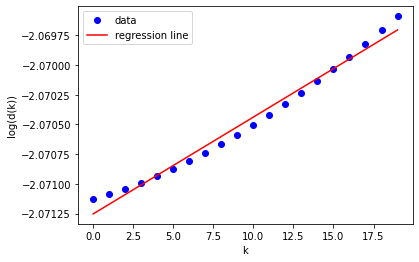

Lyapunov exponent for A: 8.140650010644423e-05


In [ ]:
series_A = np.array(df_A['Signal2'])
alpha = nolds.lyap_r(series_A[:10000], debug_plot=True )
print("Lyapunov exponent for A: {}".format(alpha))

##For Label 'B'

/usr/local/lib/python3.7/dist-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


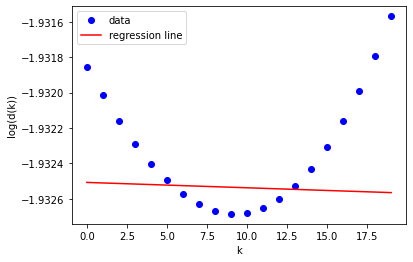

Lyapunov exponent for B: -3.0287019498362825e-06


In [ ]:
series_B = np.array(df_B['Signal2'])
alpha = nolds.lyap_r(series_B[:10000], debug_plot=True )
print("Lyapunov exponent for B: {}".format(alpha))

##For Label 'C'

/usr/local/lib/python3.7/dist-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


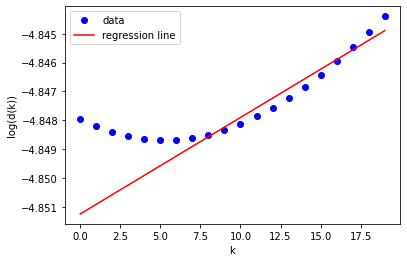

Lyapunov exponent for C: 0.0003339348258553014


In [ ]:
series_C = np.array(df_C['Signal2'])
alpha = nolds.lyap_r(series_C[:10000], debug_plot=True )
print("Lyapunov exponent for C: {}".format(alpha))

The function lyap_r stimates the largest Lyapunov exponent using the algorithm of Rosenstein et a. The calculated values for all the signals are:

Label A -> 8.14065

Label B -> -3.0287

Label C -> 0.00029

With Label B having a negative lyapunov exponent value. It can easily be concluded that Label B is the most complex in terms of signal 2.